In [2]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
######### AirPassengers

In [4]:
ausgas = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\AusGas.csv")
ausgas.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


In [5]:
y = ausgas['GasProd']
y_train = y[:-6]
y_test = y[-6:]

In [6]:
######### Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8768.410, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8728.441, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8741.007, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8766.852, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8717.868, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8704.773, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8662.074, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8638.897, Time=0.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8506.777, Time=1.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8516.071, Time=1.02 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8511.586, Time=1.77 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8393.374, Time=1.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8447.335, Time=1.07 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : 

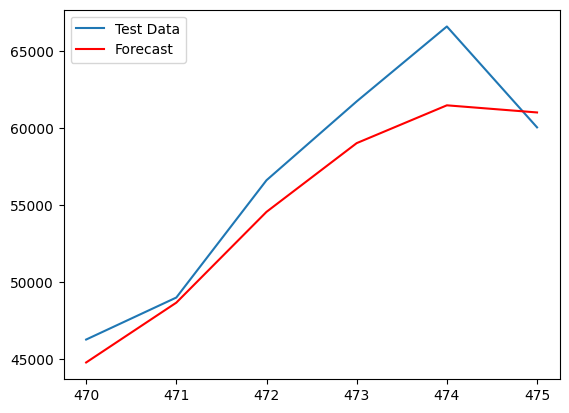

In [7]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

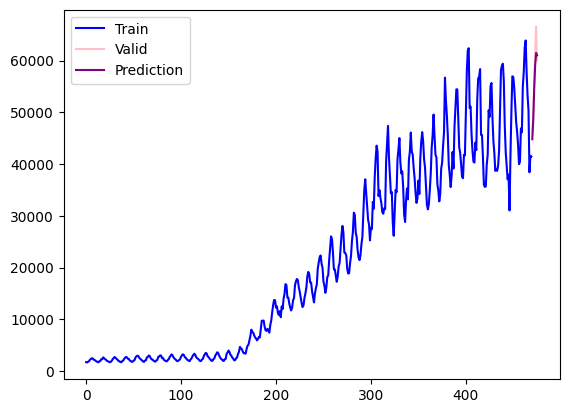

In [8]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [9]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 2613.073


In [10]:
############# SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8404.512, Time=2.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8768.410, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8398.887, Time=0.84 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8583.487, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8766.852, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8728.441, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8330.028, Time=1.56 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8583.004, Time=0.58 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8357.864, Time=3.02 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8346.758, Time=3.23 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8514.741, Time=1.38 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.94 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8358.586, Time=1.28 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

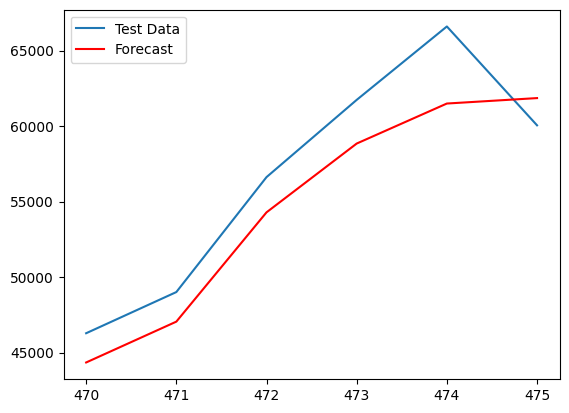

In [11]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

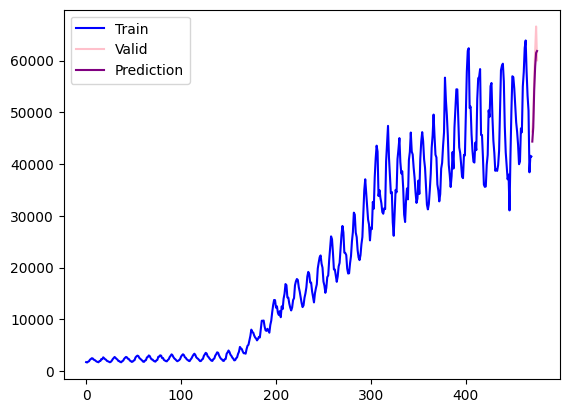

In [12]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [13]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 2906.197
